In [1]:
import os
import h5py
import scanpy as sc
import pandas as pd
import numpy as np
import json
import math
import nexusformat.nexus as nx
import anndata as ad
import matplotlib.pyplot as plt

In [2]:
os.chdir('/tscc/projects/ps-palmer/brittany/SUD_cross_species/')

In [3]:
file_path_neuron='scRNA_seq/Neurons.h5ad'
file_path_nonneuron='scRNA_seq/Nonneurons.h5ad'

## check file

In [4]:
#check if corrupted
try:
    with h5py.File(file_path_neuron, "r") as f:
        print("Neuron file is a valid HDF5 file.")
except Exception as e:
    print("Neruon file is not a valid HDF5 file:")

try:
    with h5py.File(file_path_nonneuron, "r") as f:
        print("Neonnuron file is a valid HDF5 file.")
except Exception as e:
    print("Nonneruon file is not a valid HDF5 file:")

Neuron file is a valid HDF5 file.
Neonnuron file is a valid HDF5 file.


In [5]:
adata_neuron = sc.read_h5ad(file_path_neuron,backed='r')
adata_neuron.obs['group']=(adata_neuron.obs['ROIGroup'].astype(str)+'_Neuron').apply(lambda x: x.replace(' ','-'))
adata_neuron.obs['dis_group']=(adata_neuron.obs['dissection'].astype(str)+'_'+adata_neuron.obs['supercluster_term'].astype(str)).apply(lambda x: x.replace(' ','-'))

In [6]:
adata_nonneuron=sc.read_h5ad(file_path_nonneuron,backed='r')
adata_nonneuron.obs['group']=(adata_nonneuron.obs['ROIGroup'].astype(str)+'_'+adata_nonneuron.obs['supercluster_term'].astype(str)).apply(lambda x: x.replace(' ','-'))
adata_nonneuron.obs['dis_group']=(adata_nonneuron.obs['dissection'].astype(str)+'_'+adata_nonneuron.obs['supercluster_term'].astype(str)).apply(lambda x: x.replace(' ','-'))

In [9]:
adata_neuron.obs

ROIGroup   ROIGroupCoarse     ROIGroupFine  \
CellID                                                                         
10X386_2:CATGGATTCTCGACGG        Hindbrain   Myelencephalon   Myelencephalon   
10X383_5:TCTTGCGGTGAATTGA        Hindbrain   Myelencephalon   Myelencephalon   
10X386_2:CTCATCGGTCGAGCAA        Hindbrain   Myelencephalon   Myelencephalon   
10X378_8:TTGGATGAGACAAGCC        Hindbrain             Pons             Pons   
10X387_7:TGAACGTAGTATTCCG        Hindbrain   Myelencephalon   Myelencephalon   
...                                    ...              ...              ...   
10X265_1:GAGTCTAGTTGGTGTT  Cerebral cortex  Cerebral cortex  Cerebral cortex   
10X191_2:TGTTCATGTTCCTACC  Cerebral nuclei  Cerebral nuclei  Basal forebrain   
10X319_5:CACGTTCGTCGGCTAC  Cerebral nuclei  Cerebral nuclei     Basal nuclei   
10X391_8:CGGGTCAAGCACACAG        Hindbrain             Pons             Pons   
10X376_7:GAACGTTGTATCGCTA  Cerebral cortex  Cerebral cortex  Cerebral cortex   

                                  roi organism_ontology_term_id  \
CellID                                                            
10X386_2:CATGGATTCTCGACGG  Human MoAN            NCBITaxon:9606   
10X383_5:TCTTGCGGTGAATTGA  Human MoSR            NCBITaxon:9606   
10X386_2:CTCATCGGTCGAGCAA  Human MoAN            NCBITaxon:9606   
10X378_8:TTGGATGAGACAAGCC  Human PnAN            NCBITaxon:9606   
10X387_7:TGAACGTAGTATTCCG  Human MoAN            NCBITaxon:9606   
...                               ...                       ...   
10X265_1:GAGTCTAGTTGGTGTT   Human A1C            NCBITaxon:9606   
10X191_2:TGTTCATGTTCCTACC   Human SEP            NCBITaxon:9606   
10X319_5:CACGTTCGTCGGCTAC   Human GPe            NCBITaxon:9606   
10X391_8:CGGGTCAAGCACACAG  Human PnRF            NCBITaxon:9606   
10X376_7:GAACGTTGTATCGCTA   Human ITG            NCBITaxon:9606   

                          disease_ontology_term_id  \
CellID                                               
10X386_2:CATGGATTCTCGACGG             PATO:0000461   
10X383_5:TCTTGCGGTGAATTGA             PATO:0000461   
10X386_2:CTCATCGGTCGAGCAA             PATO:0000461   
10X378_8:TTGGATGAGACAAGCC             PATO:0000461   
10X387_7:TGAACGTAGTATTCCG             PATO:0000461   
...                                            ...   
10X265_1:GAGTCTAGTTGGTGTT             PATO:0000461   
10X191_2:TGTTCATGTTCCTACC             PATO:0000461   
10X319_5:CACGTTCGTCGGCTAC             PATO:0000461   
10X391_8:CGGGTCAAGCACACAG             PATO:0000461   
10X376_7:GAACGTTGTATCGCTA             PATO:0000461   

                          self_reported_ethnicity_ontology_term_id  \
CellID                                                               
10X386_2:CATGGATTCTCGACGG                                  unknown   
10X383_5:TCTTGCGGTGAATTGA                                  unknown   
10X386_2:CTCATCGGTCGAGCAA                                  unknown   
10X378_8:TTGGATGAGACAAGCC                                  unknown   
10X387_7:TGAACGTAGTATTCCG                                  unknown   
...                                                            ...   
10X265_1:GAGTCTAGTTGGTGTT                                  unknown   
10X191_2:TGTTCATGTTCCTACC                                  unknown   
10X319_5:CACGTTCGTCGGCTAC                                  unknown   
10X391_8:CGGGTCAAGCACACAG                                  unknown   
10X376_7:GAACGTTGTATCGCTA                                  unknown   

                          assay_ontology_term_id sex_ontology_term_id  \
CellID                                                                  
10X386_2:CATGGATTCTCGACGG            EFO:0009922         PATO:0000384   
10X383_5:TCTTGCGGTGAATTGA            EFO:0009922         PATO:0000384   
10X386_2:CTCATCGGTCGAGCAA            EFO:0009922         PATO:0000384   
10X378_8:TTGGATGAGACAAGCC            EFO:0009922         PATO:0000384   
10X387_7:TGAACGTAGTATTCCG            EFO:0009922         PATO:0000384

In [10]:
t=adata_nonneuron.obs[['ROIGroup','dissection']].drop_duplicates().sort_values('ROIGroup')
#t.to_csv('scRNA_seq/ROIGroup_ROIGroupFine_mapping.csv',index=False)
t=adata_nonneuron.obs[['ROIGroup','dissection']].drop_duplicates()
#t.to_csv('scRNA_seq/ROIGroup_dissection_mapping.csv',index=False)

In [13]:
set(adata_nonneuron.obs.dis_group)

{'Amygdaloid-complex-(AMY)---Basolateral-nuclear-group-(BLN)---lateral-nucleus---La_Astrocyte',
 'Amygdaloid-complex-(AMY)---Basolateral-nuclear-group-(BLN)---lateral-nucleus---La_Committed-oligodendrocyte-precursor',
 'Amygdaloid-complex-(AMY)---Basolateral-nuclear-group-(BLN)---lateral-nucleus---La_Ependymal',
 'Amygdaloid-complex-(AMY)---Basolateral-nuclear-group-(BLN)---lateral-nucleus---La_Fibroblast',
 'Amygdaloid-complex-(AMY)---Basolateral-nuclear-group-(BLN)---lateral-nucleus---La_Microglia',
 'Amygdaloid-complex-(AMY)---Basolateral-nuclear-group-(BLN)---lateral-nucleus---La_Oligodendrocyte',
 'Amygdaloid-complex-(AMY)---Basolateral-nuclear-group-(BLN)---lateral-nucleus---La_Oligodendrocyte-precursor',
 'Amygdaloid-complex-(AMY)---Basolateral-nuclear-group-(BLN)---lateral-nucleus---La_Vascular',
 'Amygdaloid-complex-(AMY)---Central-nuclear-group---CEN_Astrocyte',
 'Amygdaloid-complex-(AMY)---Central-nuclear-group---CEN_Committed-oligodendrocyte-precursor',
 'Amygdaloid-complex

In [17]:
count_non=pd.DataFrame(pd.Series(adata_nonneuron.obs.dis_group).value_counts())
count_neur=pd.DataFrame(pd.Series(adata_neuron.obs.dis_group).value_counts())
count=pd.concat([t_neur,t_non])
#t.to_csv('scRNA_seq/group_counts_hba_dissection.csv')

In [18]:
count[count.index.str.startswith('_')] 

dis_group
_Upper-layer-intratelencephalic             910
_Splatter                                   677
_CGE-interneuron                            435
_MGE-interneuron                            391
_Medium-spiny-neuron                        380
_Deep-layer-intratelencephalic              253
_Deep-layer-corticothalamic-and-6b          110
_Midbrain-derived-inhibitory                 96
_Miscellaneous                               73
_Eccentric-medium-spiny-neuron               51
_LAMP5-LHX6-and-Chandelier                   47
_Deep-layer-near-projecting                  14
_Amygdala-excitatory                          5
_Upper-rhombic-lip                            3
_Cerebellar-inhibitory                        1
_Lower-rhombic-lip                            1
_Oligodendrocyte                           3106
_Astrocyte                                  711
_Oligodendrocyte-precursor                  493
_Microglia                                  467
_Vascular                                    25
_Fibroblast                                  23
_Committed-oligodendrocyte-precursor          3

## ID groups that don't have dissection

In [26]:
set(adata_nonneuron.obs['dissection'])

{'',
 'Amygdaloid complex (AMY) - Basolateral nuclear group (BLN) - lateral nucleus - La',
 'Amygdaloid complex (AMY) - Central nuclear group - CEN',
 'Amygdaloid complex (AMY) - Corticomedial nuclear group (CMN) - anterior cortical nucleus - CoA',
 'Amygdaloid complex (AMY) - basolateral nuclear group (BLN) - basolateral nucleus (basal nucleus) - BL',
 'Amygdaloid complex (AMY) - basolateral nuclear group (BLN) - basomedial nucleus (accessory basal nucleus) - BM',
 'Amygdaloid complex (AMY) - corticomedial nuclear group - CMN',
 'Basal forebrain (BF) - septal nuclei - SEP',
 'Basal forebrain (BF) - substantia innominata and nearby nuclei - SI',
 'Basal nuclei (BN) - Body of the Caudate - CaB',
 'Basal nuclei (BN) - Globus pallidus (GP) - External segment of globus pallidus - GPe',
 'Basal nuclei (BN) - Globus pallidus (GP) - Internal segment of globus pallidus - GPi',
 'Basal nuclei (BN) - Nucleus Accumbens - NAC',
 'Basal nuclei (BN) - Putamen - Pu',
 'Body of hippocampus (HiB) - Ros

In [27]:
set(adata_neuron.obs['dissection'])

{'',
 'Amygdaloid complex (AMY) - Basolateral nuclear group (BLN) - lateral nucleus - La',
 'Amygdaloid complex (AMY) - Central nuclear group - CEN',
 'Amygdaloid complex (AMY) - Corticomedial nuclear group (CMN) - anterior cortical nucleus - CoA',
 'Amygdaloid complex (AMY) - basolateral nuclear group (BLN) - basolateral nucleus (basal nucleus) - BL',
 'Amygdaloid complex (AMY) - basolateral nuclear group (BLN) - basomedial nucleus (accessory basal nucleus) - BM',
 'Amygdaloid complex (AMY) - corticomedial nuclear group - CMN',
 'Basal forebrain (BF) - septal nuclei - SEP',
 'Basal forebrain (BF) - substantia innominata and nearby nuclei - SI',
 'Basal nuclei (BN) - Body of the Caudate - CaB',
 'Basal nuclei (BN) - Globus pallidus (GP) - External segment of globus pallidus - GPe',
 'Basal nuclei (BN) - Globus pallidus (GP) - Internal segment of globus pallidus - GPi',
 'Basal nuclei (BN) - Nucleus Accumbens - NAC',
 'Basal nuclei (BN) - Putamen - Pu',
 'Body of hippocampus (HiB) - Ros

In [23]:
adata_nonneuron.obs[['ROIGroup','ROIGroupCoarse','ROIGroupFine','roi','dissection']]

ROIGroup   ROIGroupCoarse     ROIGroupFine  \
CellID                                                                         
10X362_3:TCAGTGAGTATTGACC     Hypothalamus     Hypothalamus     Hypothalamus   
10X362_5:TCCGTGTGTGAAAGTT     Hypothalamus     Hypothalamus     Hypothalamus   
10X362_5:CACGGGTAGAGCAGAA     Hypothalamus     Hypothalamus     Hypothalamus   
10X362_5:GATTCTTGTATGTCAC     Hypothalamus     Hypothalamus     Hypothalamus   
10X362_6:AGGACTTGTATCCTTT     Hypothalamus     Hypothalamus     Hypothalamus   
...                                    ...              ...              ...   
10X194_8:GAAATGAGTTCGGCTG         Midbrain         Midbrain         Midbrain   
10X350_4:TTTACCATCGCACGAC        Hindbrain       Cerebellum       Cerebellum   
10X225_1:AGAAGCGTCCATATGG         Midbrain         Midbrain         Midbrain   
10X221_5:TTGAACGCAGCCTTCT  Cerebral cortex  Cerebral cortex  Cerebral cortex   
10X385_3:CTACCCAGTGGCGCTT  Cerebral nuclei  Cerebral nuclei     Basal nuclei   

                                  roi  \
CellID                                  
10X362_3:TCAGTGAGTATTGACC    Human MN   
10X362_5:TCCGTGTGTGAAAGTT    Human MN   
10X362_5:CACGGGTAGAGCAGAA    Human MN   
10X362_5:GATTCTTGTATGTCAC    Human MN   
10X362_6:AGGACTTGTATCCTTT    Human MN   
...                               ...   
10X194_8:GAAATGAGTTCGGCTG    Human SN   
10X350_4:TTTACCATCGCACGAC  Human CbDN   
10X225_1:AGAAGCGTCCATATGG   Human PAG   
10X221_5:TTGAACGCAGCCTTCT   Human STG   
10X385_3:CTACCCAGTGGCGCTT   Human GPi   

                                                                  dissection  
CellID                                                                        
10X362_3:TCAGTGAGTATTGACC  Hypothalamus (HTH) - mammillary region of HTH ...  
10X362_5:TCCGTGTGTGAAAGTT  Hypothalamus (HTH) - mammillary region of HTH ...  
10X362_5:CACGGGTAGAGCAGAA  Hypothalamus (HTH) - mammillary region of HTH ...  
10X362_5:GATTCTTGTATGTCAC  Hypothalamus (HTH) - mammillary region of HTH ...  
10X362_6:AGGACTTGTATCCTTT  Hypothalamus (HTH) - mammillary region of HTH ...  
...                                                                      ...  
10X194_8:GAAATGAGTTCGGCTG               Midbrain (M) - Substantia Nigra - SN  
10X350_4:TTTACCATCGCACGAC    Cerebellum (CB) - Cerebellar deep nuclei - CbDN  
10X225_1:AGAAGCGTCCATATGG  Midbrain (M) - Periaqueductal gray and nearby ...  
10X221_5:TTGAACGCAGCCTTCT  Cerebral cortex (Cx) - Superior Temporal Gyrus...  
10X385_3:CTACCCAGTGGCGCTT  Basal nuclei (BN) - Globus pallidus (GP) - Int...  

[888263 rows x 5 columns]

# plot value counts

Text(0, 0.5, 'cells')

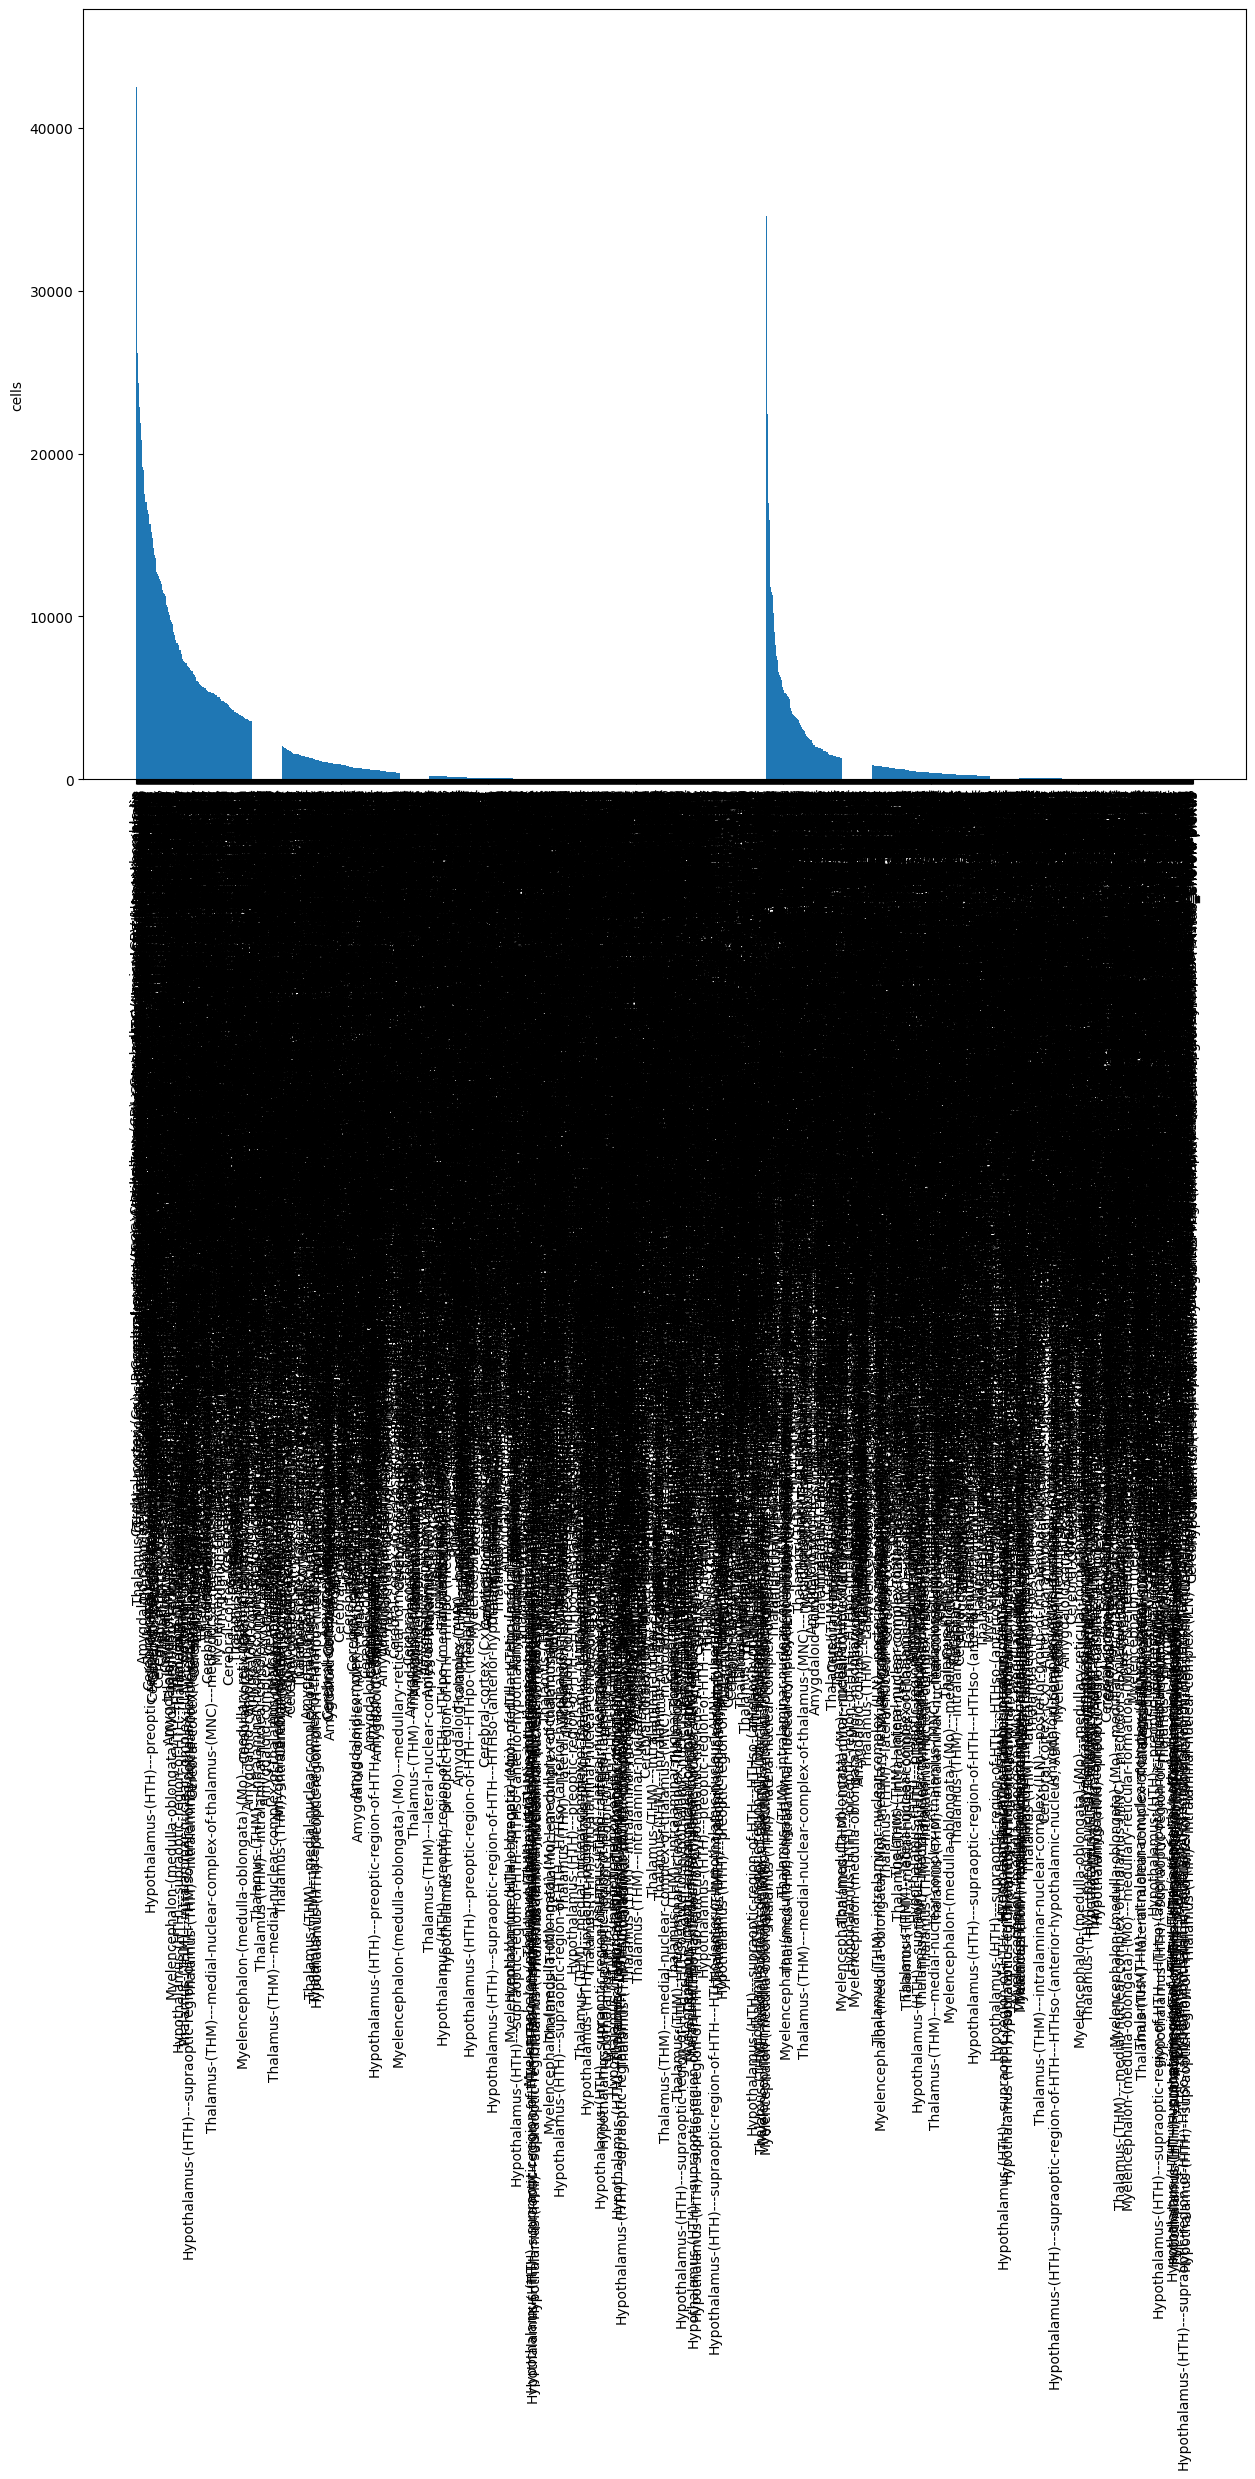

In [21]:
fig = plt.figure(figsize=(15, 10))
plt.bar(x=t.index,height=t['dis_group'])
#plt.yscale('log')
plt.xticks(rotation=90)
plt.ylabel('cells')

Text(0, 0.5, 'cells')

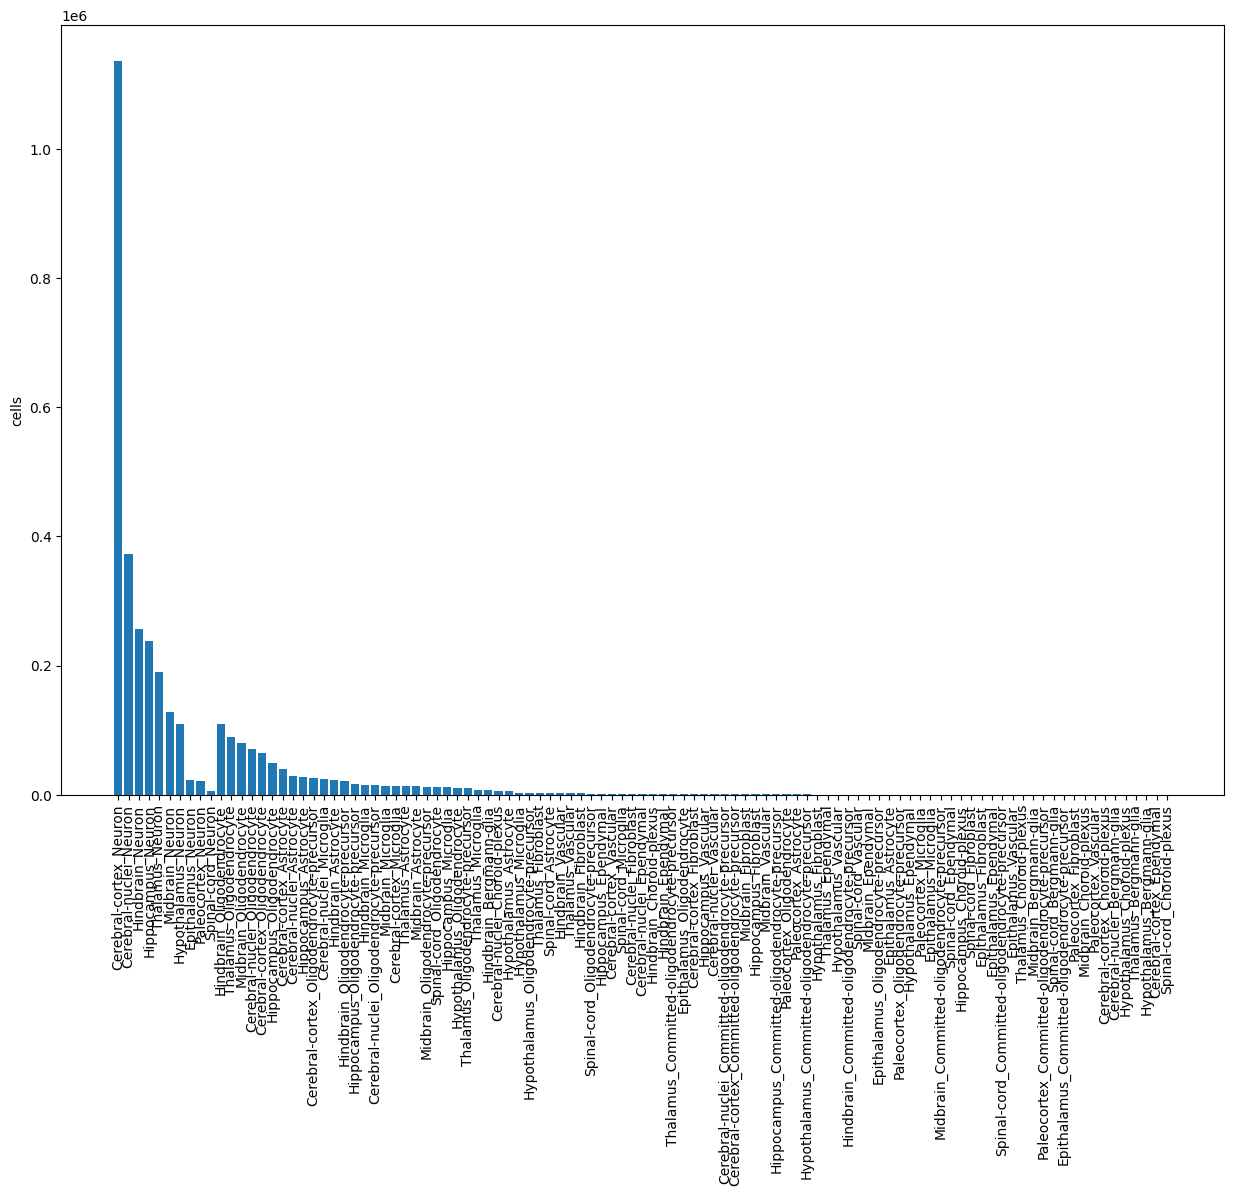

In [10]:
t_non=pd.DataFrame(pd.Series(adata_nonneuron.obs.group).value_counts())
t_neur=pd.DataFrame(pd.Series(adata_neuron.obs.group).value_counts())
t=pd.concat([t_neur,t_non])
t.to_csv('scRNA_seq/ROI_breakdown/group_counts_hba_ROIGroup.csv')
fig = plt.figure(figsize=(15, 10))
plt.bar(x=t.index,height=t['group'])
#plt.yscale('log')
plt.xticks(rotation=90)
plt.ylabel('cells')

In [16]:
t

ROIGroup  \
CellID                                       
10X362_3:TCAGTGAGTATTGACC     Hypothalamus   
10X418_2:TTCCTTCTCTCGTCGT        Hindbrain   
10X419_2:AGTGATCGTAACCCTA  Cerebral nuclei   
10X362_1:GTCATGAGTCGCTTAA         Thalamus   
10X388_2:TGATTCTTCTCATTAC        Hindbrain   
...                                    ...   
10X173_2:GCTGAATCAAGCAATA  Cerebral cortex   
10X348_6:TCTACATTCAGCAGAG  Cerebral cortex   
10X380_2:CAGATTGCAGAACTAA  Cerebral cortex   
10X172_7:ACGTAGTTCATTACTC  Cerebral cortex   
10X418_8:GTAGATCCACGCTATA  Cerebral cortex   

                                                                  dissection  
CellID                                                                        
10X362_3:TCAGTGAGTATTGACC  Hypothalamus (HTH) - mammillary region of HTH ...  
10X418_2:TTCCTTCTCTCGTCGT                                                     
10X419_2:AGTGATCGTAACCCTA                                                     
10X362_1:GTCATGAGTCGCTTAA  Thalamus (THM) - intralaminar nuclear complex ...  
10X388_2:TGATTCTTCTCATTAC  Myelencephalon (medulla oblongata) (Mo) - prec...  
...                                                                      ...  
10X173_2:GCTGAATCAAGCAATA  Paleocortex (PalCx) - Anterior Olfactory Nucle...  
10X348_6:TCTACATTCAGCAGAG  Cerebral cortex (Cx) - Temporal pole (TP) - Te...  
10X380_2:CAGATTGCAGAACTAA  Cerebral cortex (Cx) - Rostral gyrus (RoG) - D...  
10X172_7:ACGTAGTTCATTACTC  Cerebral cortex (Cx) - Gyrus rectus (ReG) - Me...  
10X418_8:GTAGATCCACGCTATA                                                     

[111 rows x 2 columns]

In [63]:
set(adata_nonneuron.obs.ROIGroupCoarse)

{'Cerebellum',
 'Cerebral cortex',
 'Cerebral nuclei',
 'Hippocampus',
 'Hypothalamus',
 'Midbrain',
 'Myelencephalon',
 'Pons',
 'Spinal cord',
 'Thalamus'}